In [7]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [8]:
df = pd.read_csv(os.path.join('Downloads','project', 'train.csv'))

In [9]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
df.iloc[300]['comment_text']

'Well you are ridiculous, in fact I suspect that you are Calton, please block me, I dont care....'

In [11]:
df[df.columns[2:]].iloc[300]

toxic            1
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 300, dtype: int64

In [12]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [13]:
df.iloc[12]['comment_text']

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [14]:
from tensorflow.keras.layers import TextVectorization

In [15]:
x = df['comment_text']
y = df[df.columns[2:]].values

In [16]:
print(y)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [17]:
print(x)

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


In [18]:
MAX_FEATURES = 200000

In [19]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1700, output_mode='int')

In [20]:
vectorizer.adapt(x.values)

In [21]:
# changeing text into numbers so we can pass it to model
vectorizer('this is project')[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 14,   9, 463,   0,   0,   0,   0,   0,   0,   0], dtype=int64)>

In [22]:
vectorized_text = vectorizer(x.values)

In [23]:
vectorized_text

<tf.Tensor: shape=(159571, 1700), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [24]:
# data pipeline to increase iffeciency 
# using tensor slice
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [25]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [20]:
# using data pipeline to train, validation, test split 
# dataset.take to take
# .skip to skip the data
# this takes batches of data (16) instaded of regular data
train = dataset.take(int(len(dataset)*.7))
validation = dataset.skip(int(len(dataset)*7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
train_generator = train.as_numpy_iterator()

In [22]:
train_generator.next()

(array([[   528,      3,     56, ...,      0,      0,      0],
        [   606,  12926,     46, ...,      0,      0,      0],
        [   423,     32, 137021, ...,      0,      0,      0],
        ...,
        [   433,     70,    265, ...,      0,      0,      0],
        [   605,    236,   4226, ...,      0,      0,      0],
        [101546,    257,   1885, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [24]:
model = Sequential()
# embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# bidirectional layer pass information in both ways
model.add(Bidirectional(LSTM(32, activation = 'tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# 6 output features
model.add(Dense(6, activation='sigmoid'))

In [25]:
model.compile(loss='BinaryCrossentropy', optimizer= "Adam")

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
# my super computer took 4 hours for this
histroy = model.fit(train, epochs=1, validation_data=validation)

6981/6981 [==============================] - 13942s 2s/step - loss: 0.0628


In [28]:
from matplotlib import pyplot as plt

<Figure size 900x900 with 0 Axes>

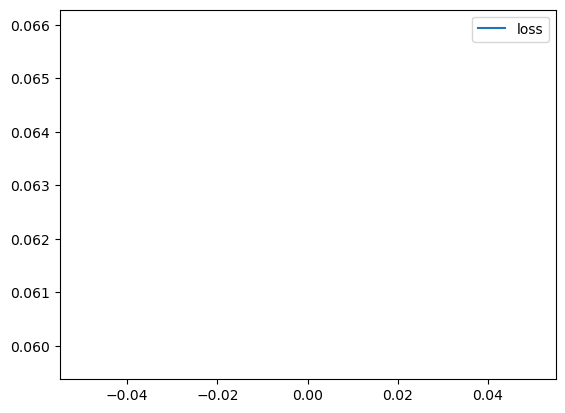

In [29]:
plt.figure(figsize=(9,9))
pd.DataFrame(histroy.history).plot()
plt.show()

In [31]:
input_text = vectorizer('You dont know shit about boxing')

In [36]:
result = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 219ms/step


In [37]:
print(result)

[[0.9685836  0.01607988 0.70732236 0.00924548 0.46616793 0.0318532 ]]


In [38]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [39]:
 from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [40]:
pre = Precision()
re = Recall()
accu = CategoricalAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    # unpacking batch
    x_true, y_true = batch
    # prediction
    yhat = model.predict(x_true)
    #flatten convert all of it to one big array
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    accu.update_state(y_true, yhat)

1/1 [==============================] - 0s 394ms/step


1/1 [==============================] - 0s 404ms/step


1/1 [==============================] - 0s 376ms/step


1/1 [==============================] - 0s 413ms/step


In [43]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {accu.result().numpy()}')

Precision: 0.8363084197044373, Recall: 0.6468859910964966, Accuracy: 0.49448344111442566


In [44]:
!pip install gradio jinja2

In [1]:
import tensorflow as tf
import gradio as gr

In [48]:
model.save('toxdect.h5')

In [2]:
model = tf.keras.models.load_model('toxdect.h5')

In [26]:
ip_str = vectorizer('Im going to knock you out')

In [28]:
result

NameError: name 'result' is not defined

In [53]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [43]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [44]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_9248\2358991581.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_9248\2358991581.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_9248\2358991581.py:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),


In [45]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7864

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
